# <span style="color: green; font-size: 40px; font-weight: bold;"> Projeto 1 (Regressão) </span>

<br><br>

# Prevendo o Valor de Propriedades Imobiliárias

<br><br>

### Contexto

- Uma empresa de corretagem imobiliária está procurando melhorar suas estimativas de preços de venda para propriedades residenciais. Eles querem usar um modelo de regressão para prever o valor de uma casa com base em várias características.
- O **objetivo** é ajudar os corretores a fornecer estimativas de preço mais precisas para seus clientes e, assim, fechar negócios mais rapidamente.

<br>

### Problema de Negócio
- Como podemos prever o valor de venda de uma propriedade residencial com base em suas características?

<br>

### Sobre o Conjunto de Dados

O conjunto de dados simulado terá 10.000 linhas e incluirá as seguintes colunas:

- **area (float)**: Área da propriedade em metros quadrados.
- **bedrooms (int)**: Número de quartos.
- **bathrooms (int)**: Número de banheiros.
- **floors (int)**: Número de andares.
- **year_built (int)**: Ano de construção.
- **location (str)**: Localização da propriedade (bairro ou cidade).
- **garage (int)**: Número de vagas na garagem.
- **value (float)**: Valor de venda da propriedade (variável alvo).


<br><br>

## Importando Pacotes

In [1]:
### Manipulação de Dados ###

# NumPy: Biblioteca para operações matemáticas e manipulação de arrays.
import numpy as np
# Pandas: Biblioteca para manipulação e análise de dados estruturados.
import pandas as pd


### Exibição de Gráficos ###

# Matplotlib: Biblioteca para criação de gráficos e visualizações.
import matplotlib.pyplot as plt
# Seaborn: Biblioteca para criação de gráficos estatísticos e visualizações.
import seaborn as sns


### Machine Learning ###

# Scikit-learn: Biblioteca para ML, incluindo ferramentas para pré-processamento, modelagem, e avaliação.
import sklearn
# Train Test Split: Função para dividir os dados em conjuntos de treino e teste.
from sklearn.model_selection import train_test_split
# StandardScaler: Ferramenta para padronização de recursos, ajustando a média e a variância.
from sklearn.preprocessing import StandardScaler
# LinearRegression, Ridge, Lasso: Algoritmos de regressão linear, incluindo regularização L2 (Ridge) e L1 (Lasso).
from sklearn.linear_model import LinearRegression, Ridge, Lasso


### Avaliação de Modelos ### 

# Métricas para avaliar o desempenho
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score


### Configurações Adicionais ###

# Configuração de estilo para visualizações Seaborn.
sns.set_style('whitegrid')
# Inline: Para exibir gráficos diretamente no Jupyter Notebook.
%matplotlib inline
# Warnings: Biblioteca para gerenciar mensagens de aviso, aqui usada para ignorar avisos futuros.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Ignorando avisos de depreciação
warnings.filterwarnings("ignore", category=DeprecationWarning)

<br><br>

## Carregando Conjunto de Dados

In [2]:
# Carrega o dataset
dados = pd.read_csv('dados/imoveis.csv')

In [3]:
# Visualiza
dados.head()

,area,bedrooms,bathrooms,floors,year_built,location,garage,value
0,174.835708,2.0,2.0,2.0,1919.0,Zona Norte,3.0,664379.908882
1,143.086785,1.0,1.0,2.0,1959.0,Zona Norte,0.0,501897.679702
2,182.384427,5.0,2.0,1.0,1939.0,Centro,1.0,803255.932459
3,226.151493,2.0,3.0,1.0,1982.0,Zona Oeste,2.0,922852.429946
4,138.292331,1.0,2.0,1.0,2001.0,Centro,1.0,433672.784015


In [4]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area        10000 non-null  float64
 1   bedrooms    9998 non-null   float64
 2   bathrooms   9997 non-null   float64
 3   floors      10100 non-null  float64
 4   year_built  9999 non-null   float64
 5   location    10100 non-null  object 
 6   garage      9999 non-null   float64
 7   value       10100 non-null  float64
dtypes: float64(7), object(1)
memory usage: 631.4+ KB


> Existem valores ausentes.

<br>

### Ordem Recomendada das Etapas de Pré-Processamento:

- **Realizar Análise Exploratória** - Realizar Análise Exploratória das Variáveis Numéricas e Categóricas
- **Transformação de Variáveis Categóricas**: Converter variáveis categóricas em numéricas.
- **Tratamento de Valores Ausentes**: Lidar com valores ausentes primeiro garante que as próximas etapas possam ser aplicadas a um conjunto de dados completo e correto.
- **Tratamento de Outliers**: Identificar e tratar outliers evita que esses valores influenciem negativamente as transformações e modelagens subsequentes.
- **Verificação de Correlação**: Avaliar a correlação entre as variáveis para entender suas relações e evitar multicolinearidade.
- **Divisão em Conjuntos de Treino e Teste**: Separar os dados em conjuntos de treino e teste antes de aplicar técnicas de modelagem.
- **Escalonamento de Dados**: Normalizar ou padronizar os dados para garantir que todas as variáveis estejam na mesma escala, especialmente importante para modelos baseados em distância.


<br><br>
## Análise Exploratória de Dados

In [5]:
# Nome das colunas
dados.columns

Index(['area', 'bedrooms', 'bathrooms', 'floors', 'year_built', 'location',
       'garage', 'value'],
      dtype='object')

#### Visualizando Variáveis Categóricas e Numéricas

In [6]:
# Exibindo Variáveis Categóricas (filtrando)
dados.dtypes[dados.dtypes == 'object']

location    object
dtype: object

In [7]:
# Exibindo Variáveis Numéricas (filtrando)
dados.dtypes[dados.dtypes != 'object']

area          float64
bedrooms      float64
bathrooms     float64
floors        float64
year_built    float64
garage        float64
value         float64
dtype: object

<br><br>

### Explorando Variáveis Numéricas

#### Resumo Estatístico

In [8]:
dados.describe()

,area,bedrooms,bathrooms,floors,year_built,garage,value
count,10000.000000,9998.000000,9997.000000,10100.000000,9999.000000,9999.00000,1.010000e+04
mean,150.390483,2.997600,1.992198,1.508812,1960.034203,1.49625,6.552605e+05
std,49.231224,1.409677,0.824021,0.499947,35.329929,1.11786,1.908042e+05
min,50.000000,1.000000,1.000000,1.000000,1900.000000,0.00000,6.927193e+04
25%,116.347417,2.000000,1.000000,1.000000,1929.000000,1.00000,5.291141e+05
50%,150.063279,3.000000,2.000000,2.000000,1960.000000,1.00000,6.521742e+05
75%,183.662711,4.000000,3.000000,2.000000,1991.000000,3.00000,7.731492e+05
max,346.311885,5.000000,3.000000,2.000000,2020.000000,3.00000,3.379100e+06


#### Visualizando através de Gráficos

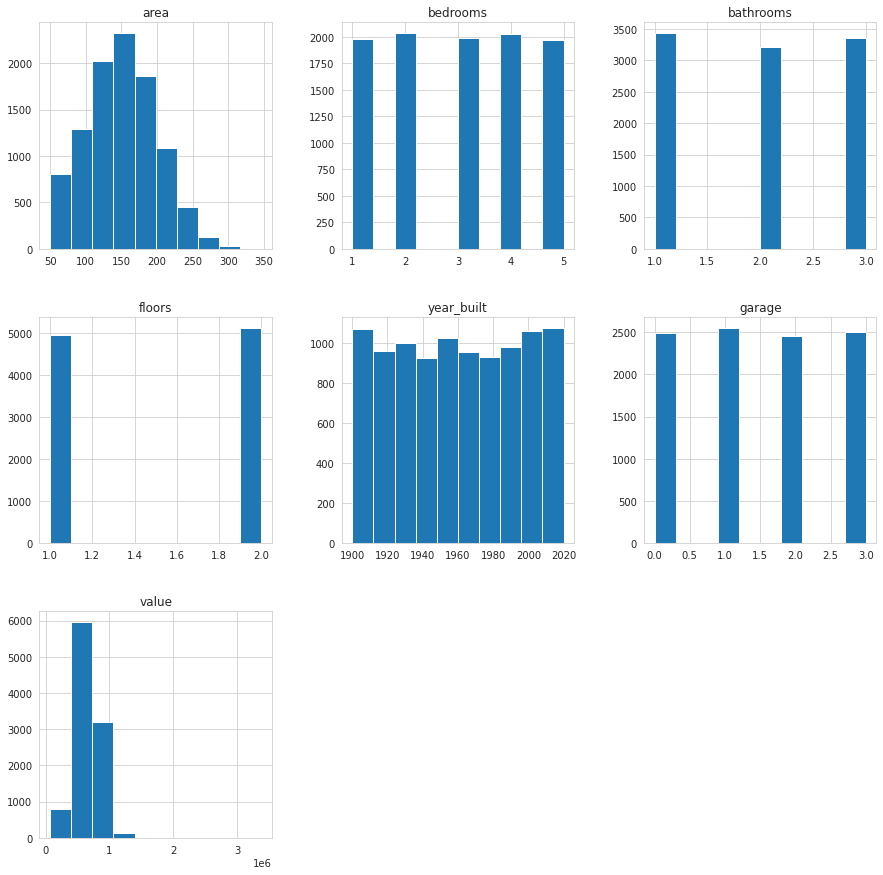

In [9]:
# Plot
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

#### Interpretando o Resumo e Gráficos

- **area**: A variável área parece estar bem distribuída, mas com um pico em torno de 150 m². **Não há muitos outliers**, mas a **dispersão é alta**, indicando uma **variação significativa nas áreas das propriedades**.

<br>

- **bedrooms**: A distribuição do número de quartos é bastante uniforme, com uma leve concentração em 3 quartos. Isso sugere que **a maioria das propriedades tem entre 2 a 4 quartos**. **Outliers não são um problema** significativo aqui.

<br>

- **bathrooms**: A distribuição do número de banheiros também é uniforme, com uma **leve concentração em 2 banheiros**. As propriedades geralmente têm entre 1 a 3 banheiros, **sem outliers significativos**.

<br>

- **floors**: Há uma **distribuição binária entre 1 e 2 andares**, com uma ligeira predominância de propriedades de 2 andares. **Não há outliers, pois a variável é discreta e limitada**.

<br>

- **year_built**: A idade das propriedades está bem distribuída ao longo do século passado. **Não há outliers claros**, mas a dispersão é ampla, indicando uma mistura de propriedades novas e antigas.

<br>

- **garage**: A distribuição do número de vagas na garagem é relativamente uniforme, com uma leve concentração em 1 e 3 vagas. **Não há outliers** significativos.

<br>

- **value**: O valor das propriedades apresenta uma **distribuição assimétrica com uma cauda longa à direita**, indicando a **presença de outliers de alto valor**. Isso sugere que algumas propriedades são significativamente mais caras que a maioria.

#### Conclusão:

- Há **outliers notáveis na variável "value"**, que poderão necessitar de tratamento específico. As demais variáveis apresentam distribuições razoavelmente uniformes ou binárias sem outliers significativos.

<br><br>

### Explorando Variável Categórica

#### Resumo Estatístico

In [10]:
# Describe (informando que é para somente variáveis categóricas)
dados.describe(include = ['object'])

,location
count,10100
unique,5
top,Zona Oeste
freq,2082


In [11]:
# Verificando Tipo de Valores
dados['location'].unique()

array(['Zona Norte', 'Centro', 'Zona Oeste', 'Zona Sul', 'Zona Leste'],
      dtype=object)

#### Visualizando através de Gráfico

Número de propriedades na Zona Oeste: 2082
Número de propriedades na Centro: 2046
Número de propriedades na Zona Sul: 2016
Número de propriedades na Zona Norte: 1997
Número de propriedades na Zona Leste: 1959


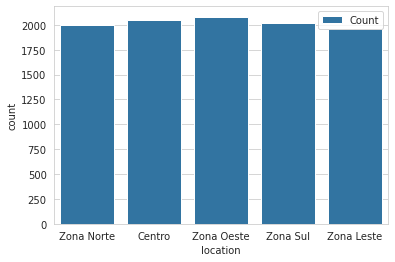

In [12]:
# Plot
sns.countplot(data = dados, x = 'location', label = 'Count')

# Value counts
location_counts = dados['location'].value_counts()

# Print
for location, count in location_counts.items():
    print(f'Número de propriedades na {location}: {count}')

### Aplicando Label Encoding
#### Vamos transformar a variável **Categórica** Gender na sua represetação **Numérica**

In [13]:
# Função para label encoding ('Centro' = 0, 'Zona Norte' = 1, 'Zona Sul' = 2, 'Zona Leste' = 3, 'Zona Oeste' = 4)
def encoding_func(x):
    if x == 'Centro':
        return 0
    elif x == 'Zona Norte':
        return 1
    elif x == 'Zona Sul':
        return 2
    elif x == 'Zona Leste':
        return 3
    elif x == 'Zona Oeste':
        return 4

# Aplica a função
dados['location'] = dados['location'].map(encoding_func)

# Verificando info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area        10000 non-null  float64
 1   bedrooms    9998 non-null   float64
 2   bathrooms   9997 non-null   float64
 3   floors      10100 non-null  float64
 4   year_built  9999 non-null   float64
 5   location    10100 non-null  int64  
 6   garage      9999 non-null   float64
 7   value       10100 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 631.4 KB


In [14]:
# Visualiza os dados
dados.sample(3)

,area,bedrooms,bathrooms,floors,year_built,location,garage,value
1446,NaN,2.0,3.0,1.0,1991.0,1,3.0,641824.554207
6770,148.397625,4.0,3.0,2.0,1990.0,3,2.0,825290.682348
5698,144.751615,3.0,2.0,2.0,2010.0,3,2.0,676237.564565


<br>

# Limpeza nos Dados

<br>

### Tratando Valores Ausentes

In [15]:
# Verifica se há valores ausentes (por coluna)
dados.isna().sum()

area          100
bedrooms      102
bathrooms     103
floors          0
year_built    101
location        0
garage        101
value           0
dtype: int64

In [16]:
# Eliminando as linhas com valores ausentes
dados = dados.dropna()


# Verifica se há valores ausentes (por coluna)
dados.isna().sum()

area          0
bedrooms      0
bathrooms     0
floors        0
year_built    0
location      0
garage        0
value         0
dtype: int64

<br>

## Tratando Valores Duplicados

In [17]:
# Shape
print(dados.shape)

# Verifica quantidade de valores duplicados
print(dados.duplicated().sum())

(9604, 8)
94


In [18]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()

# Shape
print(dados.shape)

(9510, 8)


<br>

## Tratando Valores Outliers

- Conforme dito acima, vamos olhar para a variável **value**.

In [19]:
# Describe
dados['value'].describe()

count    9.510000e+03
mean     6.552477e+05
std      1.896765e+05
min      6.927193e+04
25%      5.294397e+05
50%      6.530258e+05
75%      7.738436e+05
max      3.379100e+06
Name: value, dtype: float64

<Axes: ylabel='value'>

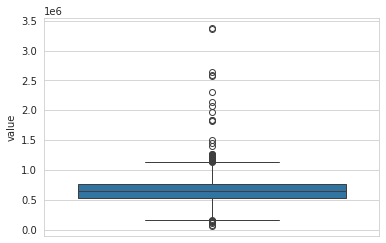

In [20]:
# Boxplot
sns.boxplot(dados.value)

In [21]:
# Exibindo a quantidade de valores acima da média:

# Cálculo da média
media = dados['value'].mean()

# Contagem de valores acima da média
total_acima_media = (dados['value'] > media).sum()

print("Total de valores acima da média:", total_acima_media)

# Quantidade de imóveis com valor abaixo de de 250 mil
abaixo_250_mil = (dados['value'] < 250000).sum()
print(f"Quantidade de imóveis com valor abaixo de 250 mil: {abaixo_250_mil}")

# Quantidade de imóveis com valor acima de 1.4 milhões
acima_1_4_milhoes = (dados['value'] > 1400000).sum()
print(f"Quantidade de imóveis com valor acima de 1.4 milhões: {acima_1_4_milhoes}")

# Quantidade de imóveis com valor acima de 1.75 milhões
acima_1_75_milhoes = (dados['value'] > 1750000).sum()
print(f"Quantidade de imóveis com valor acima de 1.75 milhões: {acima_1_75_milhoes}")

# Quantidade de imóveis com valor acima de 2 milhões
acima_2_milhoes = (dados['value'] > 2000000).sum()
print(f"Quantidade de imóveis com valor acima de 2 milhões: {acima_2_milhoes}")

# Quantidade de imóveis com valor acima de 2.5 milhões
acima_2_5_milhoes = (dados['value'] > 2500000).sum()
print(f"Quantidade de imóveis com valor acima de 2.5 milhões: {acima_2_5_milhoes}")

# Quantidade de imóveis com valor acima de 3 milhões
acima_3_milhoes = (dados['value'] > 3000000).sum()
print(f"Quantidade de imóveis com valor acima de 3 milhões: {acima_3_milhoes}")


print("Total de valores na variável:", len(dados['value']))

Total de valores acima da média: 4709
Quantidade de imóveis com valor abaixo de 250 mil: 87
Quantidade de imóveis com valor acima de 1.4 milhões: 15
Quantidade de imóveis com valor acima de 1.75 milhões: 12
Quantidade de imóveis com valor acima de 2 milhões: 8
Quantidade de imóveis com valor acima de 2.5 milhões: 5
Quantidade de imóveis com valor acima de 3 milhões: 2
Total de valores na variável: 9510


#### Removendo Valores Acima de 2 milhões

In [22]:
# Removendo imóveis com valor abaixo de 250 mil
dados = dados[dados['value'] >= 250000]

# Removendo imóveis com valor acima de 1.4 milhões
dados = dados[dados['value'] <= 1400000]

# Verificando o resultado
print(dados['value'].describe())

count    9.408000e+03
mean     6.569848e+05
std      1.735392e+05
min      2.523682e+05
25%      5.330157e+05
50%      6.549217e+05
75%      7.744031e+05
max      1.276326e+06
Name: value, dtype: float64


<Axes: ylabel='value'>

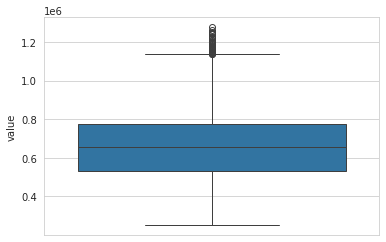

In [23]:
# Boxplot
sns.boxplot(dados.value)

### Conclusão
- O objetivo do tratamento de outliers foi reduzir o impacto de valores extremos na variável "value" para melhorar a qualidade do modelo de regressão e garantir que os resultados sejam representativos da maioria dos imóveis no conjunto de dados.

<br>

- **Remoção de Valores Abaixo de 250 Mil**: Imóveis com valores abaixo de 250 mil representavam apenas **87 casos**, o que é uma pequena fração do total. Esses imóveis podem ser considerados atípicos e poderiam distorcer as análises, influenciando negativamente as estatísticas e a precisão do modelo.
- **Remoção de Valores Acima de 1.4 Milhões**: Imóveis com valores acima de 1.4 milhões representavam apenas **15 casos**. Esses valores são consideravelmente mais altos do que a média e o desvio padrão, indicando que são outliers. A remoção desses imóveis ajuda a evitar que esses valores extremos afetem desproporcionalmente os resultados da modelagem.

<br>

## Verificando Correlação

In [24]:
# Verificando Correlação (tabela)
dados.corr()

,area,bedrooms,bathrooms,floors,year_built,location,garage,value
area,1.000000,-0.015345,-0.007077,-0.015706,-0.011728,0.010285,0.001241,0.823034
bedrooms,-0.015345,1.000000,0.020576,-0.016490,0.011355,-0.004973,-0.014242,0.392146
bathrooms,-0.007077,0.020576,1.000000,-0.015821,-0.003746,0.010069,-0.007227,0.144430
floors,-0.015706,-0.016490,-0.015821,1.000000,-0.004557,0.005059,0.002812,0.031967
year_built,-0.011728,0.011355,-0.003746,-0.004557,1.000000,0.004074,-0.010321,0.197656
location,0.010285,-0.004973,0.010069,0.005059,0.004074,1.000000,-0.006029,0.012395
garage,0.001241,-0.014242,-0.007227,0.002812,-0.010321,-0.006029,1.000000,0.081803
value,0.823034,0.392146,0.144430,0.031967,0.197656,0.012395,0.081803,1.000000


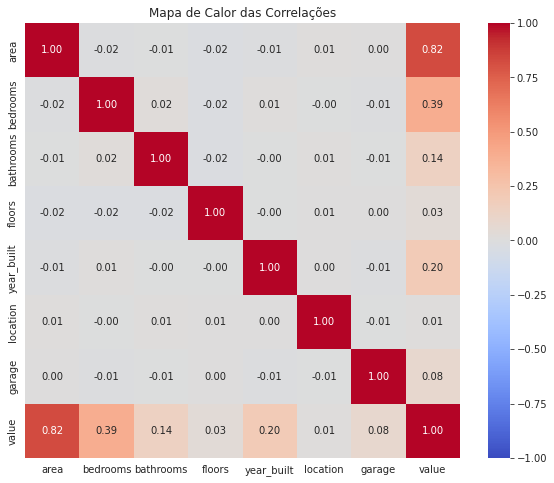

In [25]:
# Visualizando Correlações através de um Mapa de Calor

# Criando o heatmap
corr_matrix = dados.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)
plt.title('Mapa de Calor das Correlações')
plt.show()

### Conclusão
- A **área da propriedade** é a variável que mais **influencia o valor de venda**, com uma correlação **positiva muito forte** (0.82).
- **Quartos e ano de construção** têm correlações **positivas moderadas e fracas**, respectivamente, indicando que também são fatores importantes, mas com menos impacto comparado à área.
- **Banheiros, andares, localização, e garagem** têm **correlações fracas** com o valor de venda, sugerindo que seu impacto é menor.
- **Relação entre as Variáveis Pretioras**: As variáveis preditivas apresentam **correlações muito fracas entre si**. Isso indica **baixa multicolinearidade**, o que é desejável em modelos de regressão, pois significa que cada variável está trazendo informações distintas e independentes.

<br>

### Análise 1 - Relação Entre Área e Valor do Imóvel

<Figure size 1296x864 with 0 Axes>

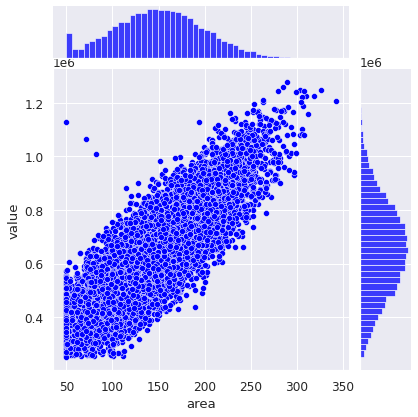

In [26]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados, 
              x = 'area', 
              y = 'value',
              color = 'blue')

In [27]:
# Correlação (tabela)
dados[['area', 'value']].corr()

,area,value
area,1.000000,0.823034
value,0.823034,1.000000


<br>

### Análise 2 - Relação Entre Quantidade de Quartos e Valor do Imóvel

<Figure size 1296x864 with 0 Axes>

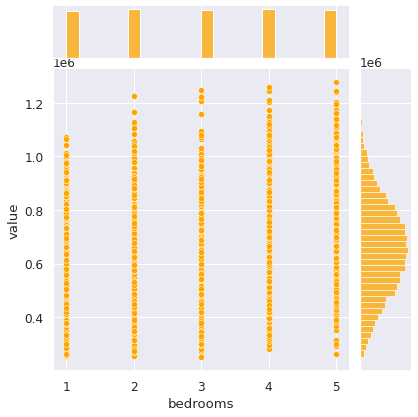

In [28]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados, 
              x = 'bedrooms', 
              y = 'value',
              color = 'orange')

In [29]:
# Correlação (tabela)
dados[['bedrooms', 'value']].corr()

,bedrooms,value
bedrooms,1.000000,0.392146
value,0.392146,1.000000


<br><br>

# Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

<br>

<br>

## Dividindo os dados em Dados de Treino e Dados de Teste
- Nós **treinamos** o modelo com **dados de treino** e **avaliamos** o modelo com **dados de teste**.

In [30]:
# Cria um objeto separado para a variável alvo
y = dados.value

# Cria um objeto separado para as variáveis de entrada
X = dados.drop('value', axis=1)

# Split em dados de treino e teste sem amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size=0.2, 
                                                        random_state=1234)

# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(7526, 7) (1882, 7) (7526,) (1882,)


<br>

## Padronização

- Não é necessário aplicar padronização/normalização na variável alvo.

In [31]:
# Inicializa o scaler
scaler = StandardScaler()

# Ajusta e transforma os dados de treino
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# Converte os arrays de volta para DataFrame
X_treino_scaled = pd.DataFrame(X_treino_scaled, columns=X_treino.columns, index=X_treino.index)
X_teste_scaled = pd.DataFrame(X_teste_scaled, columns=X_teste.columns, index=X_teste.index)

X_treino = X_treino_scaled
X_teste = X_teste_scaled

In [32]:
# Verifica os DataFrames escalonados
print(X_treino.head())
print(X_teste.head())

          area  bedrooms  bathrooms    floors  year_built  location    garage
8367  0.372831 -1.427639   1.212215  0.995492    0.643081  1.393791  0.454270
6181 -0.338076  0.707719  -1.215441 -1.004528    0.558135 -0.013463  0.454270
2257 -0.457169  1.419505  -1.215441  0.995492   -0.546163 -0.013463 -0.437445
3885  0.531222 -1.427639  -0.001613 -1.004528    1.209387 -0.717090 -0.437445
3762 -0.862266 -0.004067   1.212215  0.995492   -0.404586 -0.013463  0.454270
          area  bedrooms  bathrooms    floors  year_built  location    garage
6909 -0.942360  0.707719  -1.215441  0.995492   -1.593830 -0.717090 -0.437445
832  -1.059650 -0.004067  -1.215441 -1.004528    1.662433 -0.013463 -1.329159
357  -0.320740  0.707719   1.212215 -1.004528    0.671396 -1.420717  1.345984
9128  0.566537 -0.004067  -0.001613  0.995492   -0.064802  1.393791  0.454270
6102 -1.193164  0.707719  -0.001613  0.995492    0.331612  0.690164  1.345984


<br><br><br><br>

<span style="color: green; font-size: 40px; font-weight: bold;">Construindo Modelos de Machine Learning</span>
### Nesta etapa do projeto, desenvolveremos e avaliaremos <u>três diferentes</u> modelos de machine learning para identificar qual deles apresenta o <u>melhor desempenho</u> para o nosso conjunto de dados.

<br>

Abaixo estão os modelos que serão implementados e testados:

<br>


- **Modelo 1**: **Regressão Linear (Benchmark)** - Utilizado como linha de base devido à sua simplicidade e eficácia em problemas de regressão. Este modelo ajudará a estabelecer uma base para a performance que esperamos superar com técnicas mais complexas.

<br>

- **Modelo 2**: **Regressão Ridge** - Um modelo de regressão que adiciona uma penalização L2 ao cálculo dos coeficientes, ajudando a reduzir o sobreajuste (overfitting) e melhorando a capacidade de generalização do modelo.

<br>

- **Modelo 3**: **Regressão LASSO** - Um modelo de regressão que aplica uma penalização L1, forçando a soma dos valores absolutos dos coeficientes a serem menores que um valor fixo. Isso pode resultar na eliminação de algumas variáveis irrelevantes, tornando o modelo mais interpretável e eficiente.

<br>

- **Modelo 4**: **Regressão ElasticNet** - Uma combinação de penalizações L1 e L2, este modelo busca combinar os benefícios de ambos os métodos Ridge e LASSO, ajustando a penalização para otimizar a performance e a interpretabilidade do modelo.

<br>

- **Modelo 5**: **Regressão com Árvores de Decisão** - Utiliza uma estrutura de árvore para modelar as relações entre variáveis preditoras e a variável alvo, podendo capturar relações não lineares e interações entre variáveis de forma eficaz.

<br>

- **Modelo 6**: **Regressão com Random Forest** - Uma extensão do modelo de árvores de decisão, que utiliza um conjunto de árvores (floresta) para melhorar a robustez e a capacidade de generalização do modelo, reduzindo o risco de overfitting.


<br><br>


Cada modelo será treinado utilizando o mesmo conjunto de dados, permitindo uma comparação justa de sua eficácia. A avaliação de cada modelo incluirá métricas como **erro médio absoluto (MAE)**, **erro quadrático médio (MSE)** e o **coeficiente de determinação (R²)**, entre outras, dependendo das especificidades de nosso problema e dados.

<br><br><br>

## Criando Dataframe para salvar métricas de cada Modelo

In [ ]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

<br><br><br>

# <span style="color: green; font-weight: bold;">Modelo 1 com Regressão Logística (Benchmark)</span>

### Criação e Treinamento do Modelo

In [34]:
# Cria o modelo
modelo_v1_RL = LinearRegression()

# Treina o modelo
modelo_v1_RL.fit(X_treino, y_treino)

LinearRegression()

#### Visualizando coeficientes das variáveis preditoras

In [35]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v1_RL.coef_, X.columns, columns=['Coeficiente'])
df_coef

,Coeficiente
area,143817.730025
bedrooms,69954.060360
bathrooms,24812.997807
floors,9422.885410
year_built,35755.182681
location,1130.528587
garage,15188.803916


### Interpretação dos Coeficientes das Variáveis Preditivas

- **area**: Cada aumento de 1 metro quadrado na área da propriedade aumenta o valor do imóvel em média em **143,817.73 unidades monetárias**.
- **bedrooms**: Cada quarto adicional aumenta o valor do imóvel em média em **69,954.06 unidades monetárias**.
- **bathrooms**: Cada banheiro adicional aumenta o valor do imóvel em média em **24,812.99 unidades monetárias**.
- **floors**: Cada andar adicional aumenta o valor do imóvel em média em **9,422.89 unidades monetárias**.
- **year_built**: Cada ano mais recente de construção aumenta o valor do imóvel em média em **35,755.18 unidades monetárias**.
- **location**: Cada mudança na localização, conforme codificação, aumenta o valor do imóvel em média em **1,130.53 unidades monetárias**.
- **garage**: Cada vaga adicional na garagem aumenta o valor do imóvel em média em **15,188.80 unidades monetárias**.

> Os **coeficientes** indicam que a **área** e o **número de quartos** são os fatores que mais **influenciam o valor do imóvel**, seguidos pelo ano de construção, número de banheiros e vagas na garagem. A localização tem um impacto menor comparativamente. Cada aumento nessas variáveis preditivas resulta em um aumento correspondente no valor do imóvel.